# Práctica 1 - Self-Organising Maps - COLORES
## Preparación de entorno
#### Importar librerías de código

In [131]:

# from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline


#### Dataset que se va a utilizar para el entrenamiento

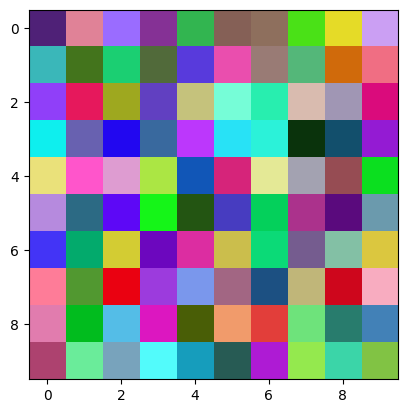

In [119]:
# Código para obtener el Dataset que se va a usar en el entrenamiento
datos = np.random.randint(0, 256, (3, 100))
#Vamos a monstrar los datos, primero creamos una matriz 10x10 con la traspuesta de datos, matplotlib usa enteros sin signo de 8 bits por lo que
#usaremos uint8.
matriz_colores = datos.T.reshape(10,10,3).astype(np.uint8)
#Ahora mostramos la matriz
plt.imshow(matriz_colores)
plt.show()

## SOM Setup
#### Variables definidas por el alumno

In [120]:
# Inicializa tamaño del mapa de Kohonen, número de iteraciones y learning rate
# Inicializa normalizar_datos dependiendo de si tienes que normalizar los datos o no
lado_mapa = 10
periodo = 100
learning_rate = 0.05
normalizar_datos = True

#### A partir de este punto solo hay cálculos. No se introducen más valores "a mano"

In [121]:
# Establece el numero de entradas del mapa y el número de datos que se van a usar para entrenar. 
# Utiliza una función que obtenga automáticamente los valores a partir del Dataset.
num_entradas = datos.shape[0]
num_datos = datos.shape[1]

# Calcula el vecindario inicial. Debe ser la mitad del lado del mapa de Kohonen
vecindario_ini = int(lado_mapa/2)

# Normaliza los datos si fuese necesario dividiendo cada dato por el máximo en la matriz
#En el caso de los colores, cada canal de color (rojo, verde, azul) puede tener valores entre 0 y 255. Si no normalizamos los datos, el
#valor de cada canal de color dominará el resultado del algoritmo de aprendizaje sin importar el valor relativo de los otros canales.
if normalizar_datos:
    datos = datos / 255
else:
    datos = datos

# Crea una matriz de pesos con valores random entre 0 y 1. Usa la función random.random de la librería NumPy
matriz_de_pesos = np.random.rand(lado_mapa, lado_mapa, num_entradas)



#### Funciones para entrenar/clasificar

In [122]:
# Función para encontrar la BMU
"""
   Encuentra la BMU para un patrón de entrada.
   Entradas: (patrón_de_entrada, matriz_de_pesos, número_de_entradas)
   Salidas:  (bmu, bmu_idx) tupla donde
               bmu: vector de pesos de la neurona ganadora
               bum_idx: coordenadas de la neurona ganadora
"""
def encontrar_bmu(patron_de_entrada, matriz_de_pesos, num_entradas):
    # Inicializar la distancia mínima y la posición de la BMU
    distancia_minima = np.iinfo(np.int).max
    bmu_idx = np.array([0, 0])
    bmu = np.zeros(num_entradas)

    # Recorrer todas las neuronas del mapa de Kohonen
    for i in range(matriz_de_pesos.shape[0]):
        for j in range(matriz_de_pesos.shape[1]):
            # Calcular la distancia euclidiana al cuadrado entre el patrón de entrada y el peso de la neurona
            distancia_cuadrada = np.sum(np.power(patron_de_entrada - matriz_de_pesos[i,j], 2))
            # Si la distancia es menor que la distancia mínima actual, actualizar la BMU
            if distancia_cuadrada < distancia_minima:
                distancia_minima = distancia_cuadrada
                bmu_idx = np.array([i, j])
                bmu = matriz_de_pesos[i,j]

    return (bmu, bmu_idx)


In [123]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta)
"""
   Calcula el Learning Rate (eta) que corresponde a la i-ésima presentación.
   Entradas: (learning_rate_inicial, iteracion, período)
   Salidas:  learning_rate para la iteración i

"""
def calcular_eta(learning_rate_inicial, iteracion, periodo):
    return learning_rate_inicial * np.exp(-iteracion/periodo)

#Usamos una funcion exp decreciente porque queremos que el learning rate disminuya con el tiempo, de esta forma, al principio del entrenamiento podemos ser más 'permisivos' con los pesos de las neuronas y a medida que avanza el entrenamiento, vamos siendo más 'exigentes' con los pesos de las neuronas y asegurar asi un ajuste más exacto al final.


In [124]:
# Función para calcular el descenso del vecindario (v)
"""
   Calcula el vecindario  (v) que corresponde a la i-ésima presentación.
   Entradas: (vecindario_inicial, iteracion, período)
   Salidas:  lvecindario para la iteración i

"""
def calcular_vecindario(vecindario_inicial, iteracion, periodo):
    return vecindario_inicial * np.exp(-iteracion/periodo)
#De igual manera, usamos una funcion exp para que así, al princio el vecindario sea mas grande y el radio de actualizacion sea mas grande, mientras el algoritmo avance, este vecindario será más pequeño.

In [125]:
# Función para calcular el descenso del coeficiente de aprendizaje (eta) en función de la distancia a la BMU
"""
   Calcula la amortiguación de eta en función de la distancia en el mapa entre una neurona y la BMU.
   Entradas: (distancia_BMU, vecindario_actual)
   Salidas:  amortiguación para la iteración

"""
def decay(distancia_BMU, vecindario_actual):
    return np.exp(-distancia_BMU**2 / (2*vecindario_actual**2))

#### Funciones para dibujar la salida de la red

In [126]:
# Función para pintar una matriz de valores como colores RGB
def pintar_mapa(matriz_valores):
    fig = plt.figure()

    #Establece ejes
    ax = fig.add_subplot(111,aspect='equal')
    ax.set_xlim((0, matriz_de_pesos.shape[0]+1))
    ax.set_ylim((0, matriz_de_pesos.shape[1]+1))
    ax.set_title('Self-Organising Map despues de %d iterations' % periodo)

    #DIbuja los rectangulos de color RGB
    for x in range(1,matriz_valores.shape[0] + 1):
        for y in range(1,matriz_valores.shape[1] + 1):
            ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                         facecolor=matriz_valores[x-1,y-1,:],
                         edgecolor='none'))
    plt.show()

## SOM Entrenamiento

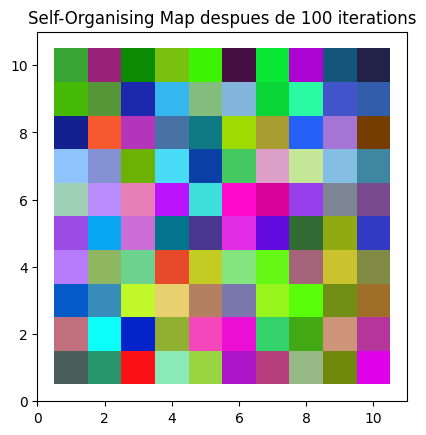

Iteración: 0
Iteración: 100
Iteración: 200
Iteración: 300


/var/folders/zx/qkhvjslx1jbc3lz56nx39bbc0000gn/T/ipykernel_85996/796116808.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distancia_minima = np.iinfo(np.int).max


Iteración: 400
Iteración: 500
Iteración: 600
Iteración: 700
Iteración: 800
Iteración: 900
Iteración: 1000
Iteración: 1100
Iteración: 1200
Iteración: 1300
Iteración: 1400
Iteración: 1500
Iteración: 1600
Iteración: 1700
Iteración: 1800
Iteración: 1900
Iteración: 2000
Iteración: 2100
Iteración: 2200
Iteración: 2300
Iteración: 2400
Iteración: 2500
Iteración: 2600
Iteración: 2700
Iteración: 2800
Iteración: 2900
Iteración: 3000
Iteración: 3100
Iteración: 3200
Iteración: 3300
Iteración: 3400
Iteración: 3500
Iteración: 3600
Iteración: 3700
Iteración: 3800
Iteración: 3900
Iteración: 4000
Iteración: 4100
Iteración: 4200
Iteración: 4300
Iteración: 4400
Iteración: 4500
Iteración: 4600
Iteración: 4700
Iteración: 4800
Iteración: 4900
Iteración: 5000
Iteración: 5100
Iteración: 5200
Iteración: 5300
Iteración: 5400
Iteración: 5500
Iteración: 5600
Iteración: 5700
Iteración: 5800
Iteración: 5900
Iteración: 6000
Iteración: 6100
Iteración: 6200
Iteración: 6300
Iteración: 6400
Iteración: 6500
Iteración: 660

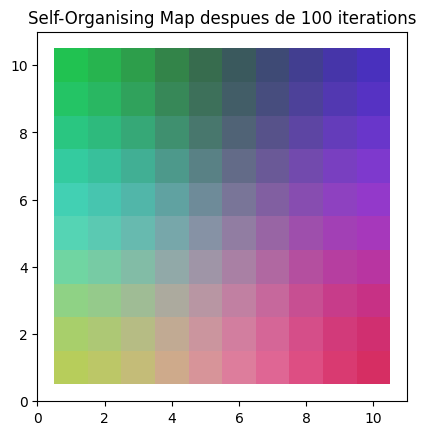

In [127]:
# Dibuja la matriz de pesos inicial como un mapa de colores RGB
pintar_mapa(matriz_de_pesos)

# Número total de iteraciones para el entrenamiento
num_iteraciones = periodo * num_datos

for iteracion in range(num_iteraciones):
    # Imprimir el número de iteración cada 100 iteraciones
    if iteracion % 100 == 0:
        print("Iteración:", iteracion)

    # Seleccionar un patrón al azar del dataset y hacer un reshape
    indice_aleatorio = np.random.randint(0, num_datos)
    patron_de_entrada = datos[:, indice_aleatorio].reshape(num_entradas)

    # Buscar la BMU
    bmu, bmu_idx = encontrar_bmu(patron_de_entrada, matriz_de_pesos, num_entradas)

    # Calcular los parámetros para esta iteración (eta y vecindario)
    eta = calcular_eta(learning_rate, iteracion, num_iteraciones)
    vecindario_actual = calcular_vecindario(vecindario_ini, iteracion, num_iteraciones)

    # Actualizar la matriz de pesos
    for x in range(matriz_de_pesos.shape[0]):
        for y in range(matriz_de_pesos.shape[1]):
            delta_peso = eta * decay(np.linalg.norm([x - bmu_idx[0], y - bmu_idx[1]]), vecindario_actual) * (patron_de_entrada - matriz_de_pesos[x, y])
            matriz_de_pesos[x, y] += delta_peso

# Imprimir la matriz de pesos entrenada
print("Matriz de pesos entrenada:")
print(matriz_de_pesos)

# Dibujar el mapa de colores RGB de la matriz de pesos entrenados
pintar_mapa(matriz_de_pesos)

## SOM Clasificación

Coordenadas (x, y) de la BMU para el patrón 0: (7, 9)
Coordenadas (x, y) de la BMU para el patrón 1: (5, 0)
Coordenadas (x, y) de la BMU para el patrón 2: (9, 5)
Coordenadas (x, y) de la BMU para el patrón 3: (7, 6)
Coordenadas (x, y) de la BMU para el patrón 4: (1, 9)
Coordenadas (x, y) de la BMU para el patrón 5: (5, 6)
Coordenadas (x, y) de la BMU para el patrón 6: (5, 6)
Coordenadas (x, y) de la BMU para el patrón 7: (0, 9)
Coordenadas (x, y) de la BMU para el patrón 8: (0, 0)
Coordenadas (x, y) de la BMU para el patrón 9: (4, 2)
Coordenadas (x, y) de la BMU para el patrón 10: (1, 5)
Coordenadas (x, y) de la BMU para el patrón 11: (3, 9)
Coordenadas (x, y) de la BMU para el patrón 12: (0, 8)
Coordenadas (x, y) de la BMU para el patrón 13: (4, 9)
Coordenadas (x, y) de la BMU para el patrón 14: (9, 7)
Coordenadas (x, y) de la BMU para el patrón 15: (6, 0)
Coordenadas (x, y) de la BMU para el patrón 16: (5, 4)
Coordenadas (x, y) de la BMU para el patrón 17: (2, 7)
Coordenadas (x, y) d

/var/folders/zx/qkhvjslx1jbc3lz56nx39bbc0000gn/T/ipykernel_85996/796116808.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  distancia_minima = np.iinfo(np.int).max


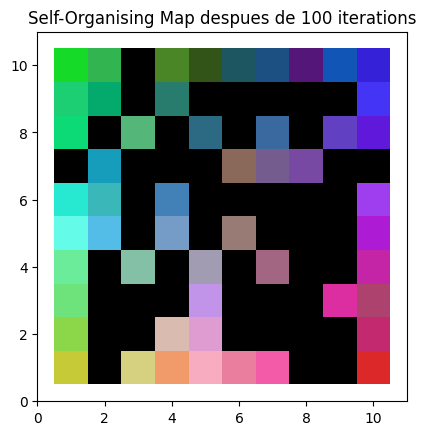

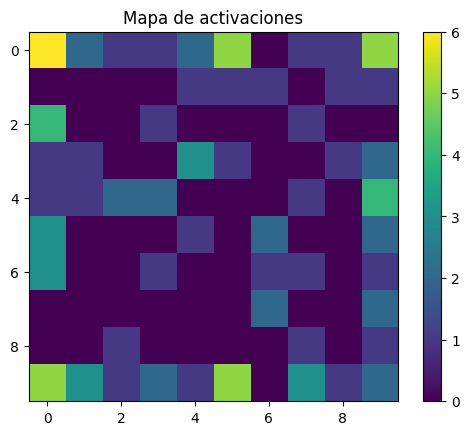

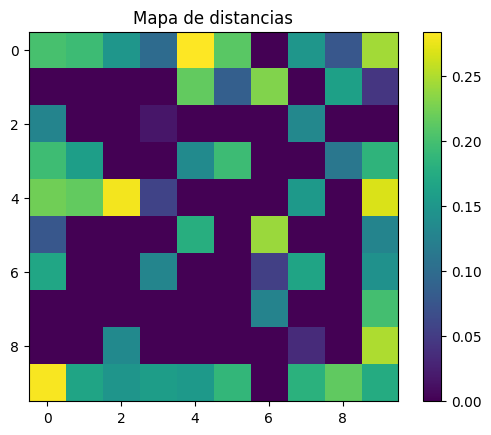

Error de Cuantificación: 0.1634146085319208
Error Topológico: 0.09711775326639646


In [130]:
# Definir e inicializar las matrices
mapa_clasificacion = np.zeros((lado_mapa, lado_mapa, num_entradas))
mapa_activaciones = np.zeros((lado_mapa, lado_mapa))
mapa_distancias = np.zeros((lado_mapa, lado_mapa))

# Clasificar el conjunto de datos de patrones
for i in range(num_datos):
    patron_de_entrada = datos[:, i].reshape(num_entradas)
    bmu, bmu_idx = encontrar_bmu(patron_de_entrada, matriz_de_pesos, num_entradas)

    x, y = bmu_idx
    print(f"Coordenadas (x, y) de la BMU para el patrón {i}: ({x}, {y})")

    # Actualizar las matrices
    mapa_clasificacion[x, y] += patron_de_entrada
    mapa_activaciones[x, y] += 1
    mapa_distancias[x, y] += np.linalg.norm(patron_de_entrada - matriz_de_pesos[x, y])

# Calcular el número de clases
num_clases = np.count_nonzero(mapa_activaciones)
print("Número de clases:", num_clases)

# Calcular y dibujar los mapas de clasificación (colores RGB), activaciones y distancias
for x in range(lado_mapa):
    for y in range(lado_mapa):
        if mapa_activaciones[x, y] > 0:
            mapa_clasificacion[x, y] /= mapa_activaciones[x, y]
            mapa_distancias[x, y] /= mapa_activaciones[x, y]

pintar_mapa(mapa_clasificacion)

plt.imshow(mapa_activaciones, cmap='viridis')
plt.title("Mapa de activaciones")
plt.colorbar()
plt.show()

plt.imshow(mapa_distancias, cmap='viridis')
plt.title("Mapa de distancias")
plt.colorbar()
plt.show()

# Calcular la distancia media del mapa (Error de Cuantificación) y el Error Topológico del mapa
error_cuantificacion = np.sum(mapa_distancias) / num_clases
print("Error de Cuantificación:", error_cuantificacion)

error_topologico = 0
for i in range(num_datos):
    patron_de_entrada = datos[:, i].reshape(num_entradas)
    bmu, bmu_idx = encontrar_bmu(patron_de_entrada, matriz_de_pesos, num_entradas)

    vecinos = [(bmu_idx[0] + i, bmu_idx[1] + j) for i in range(-1, 2) for j in range(-1, 2) if 0 <= bmu_idx[0] + i < lado_mapa and 0 <= bmu_idx[1] + j < lado_mapa]
    vecinos.remove(tuple(bmu_idx))

    error_vecinos = 0
    for x, y in vecinos:
        error_vecinos += np.linalg.norm(matriz_de_pesos[x, y] - matriz_de_pesos[bmu_idx[0], bmu_idx[1]])

    error_topologico += error_vecinos / len(vecinos)

error_topologico /= num_datos
print("Error Topológico:", error_topologico)
